## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, on='Mouse ID')
# Display the data table for preview
mouse_study.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_count = len(mouse_study["Mouse ID"].unique())
mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_duplicate = mouse_study[mouse_study.duplicated()]
mouse_duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_g989 = mouse_study.loc[mouse_study["Mouse ID"] == "g989"]
mouse_g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#drop_duplicate_mouse = mouse_study.drop_duplicates(subset = "Mouse ID" and "Timepoint", keep = "first", inplace = False)
#drop_duplicate_mouse
duplicate_mouse_drop = mouse_study.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first', inplace=False)
duplicate_mouse_drop

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_count_duplicate = len(duplicate_mouse_drop["Mouse ID"].unique())
mouse_count_duplicate

249

## Summary Statistics

In [7]:

means = duplicate_mouse_drop.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
medians = duplicate_mouse_drop.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variance = duplicate_mouse_drop.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
std = duplicate_mouse_drop.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sems = duplicate_mouse_drop.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
statistics_mouse = pd.DataFrame({"Mean": means, "Median": medians, "Var": variance, "Std": std,"Sem": sems})
statistics_mouse
# This method is the most straighforward, creating multiple series and putting them all together at the end.



,Mean,Median,Var,Std,Sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_mouse = duplicate_mouse_drop.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})   
grouped_mouse

# This method produces everything in a single groupby function


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice')

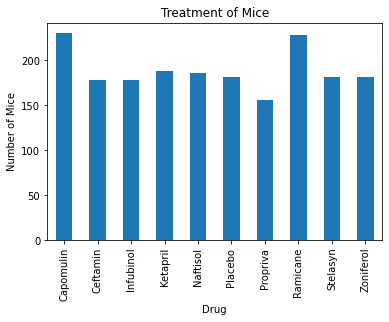

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
drug_mouse = duplicate_mouse_drop.groupby('Drug Regimen')
count_of_mouse = drug_mouse['Mouse ID'].count()
mouse_chart = count_of_mouse.plot(kind="bar", title="Treatment of Mice")
mouse_chart.set_xlabel("Drug")
mouse_chart.set_ylabel("Number of Mice")

In [10]:
count_of_mouse = drug_mouse['Mouse ID'].count
count_of_mouse

<bound method SeriesGroupBy.count of <pandas.core.groupby.generic.SeriesGroupBy object at 0x000002067AD778D0>>

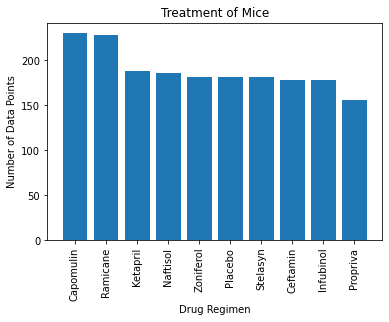

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
mouse_count = duplicate_mouse_drop['Drug Regimen'].value_counts()
#x_axis = np.arange(0, len(duplicate_mouse_drop['Drug Regimen']))

plt.bar(mouse_count.index.values, mouse_count.values)    

#tick_locations = [value for value in x_axis]
#for x in x_axis:
    #tick_locations.append(x)
plt.xticks(rotation=90)
#plt.xlim(-0.75, len(x_axis)-0.25)
#plt.ylim(0, mouse_count + 10)

plt.title("Treatment of Mice")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
mouse_count
plt.show()

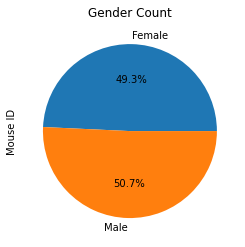

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_mouse = duplicate_mouse_drop.groupby('Sex')
count_of_mouse = gender_mouse['Mouse ID'].count()
mouse_chart = count_of_mouse.plot(kind="pie", title="Gender Count", autopct="%1.1f%%")


In [13]:
counts = duplicate_mouse_drop['Sex'].value_counts()

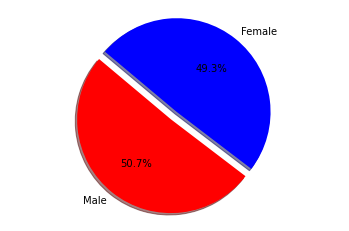

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = duplicate_mouse_drop['Sex'].unique()
colors = ["red", "blue"]
explode = (0.1, 0)

plt.pie(counts, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)    

plt.axis("equal")

plt.show()


## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment = duplicate_mouse_drop.groupby("Mouse ID").max()['Timepoint']

# Start by getting the last (greatest) timepoint for each mouse
treatment_merge = pd.merge(duplicate_mouse_drop, treatment, how='right', on=['Mouse ID', 'Timepoint'])
mouse_regimen = treatment_merge[["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]
treatment_capomulin_df = duplicate_mouse_drop.loc[duplicate_mouse_drop['Drug Regimen'] == "Capomulin", :]
treatment_ramicane_df = duplicate_mouse_drop.loc[duplicate_mouse_drop['Drug Regimen'] == "Ramicane", :]
treatment_infubinol_df = duplicate_mouse_drop.loc[duplicate_mouse_drop['Drug Regimen'] == "Infubinol", :]
treatment_ceftamin_df = duplicate_mouse_drop.loc[duplicate_mouse_drop['Drug Regimen'] == "Ceftamin", :]
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
drugs =["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
for drug in drugs:
    tumor_volumes = mouse_regimen.loc[mouse_regimen['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    vol_data.append(tumor_volumes)

    quartiles = tumor_volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    IQR = upperq - lowerq
    lower_bound = lowerq - (1.5*IQR)
    upper_bound = upperq + (1.5*IQR)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

    print(f"---------------------------------------------")
    print(f"{drug} IQR data is:")
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The higher quartile of {drug} is: {upperq}")
    print(f"The median of {drug} is: {quartiles[0.5]}")
    print(f"Values below {lower_bound} for {drug} could be outliers")
    print(f"Values above {upper_bound} for {drug} could be outliers")
print(f"---------------------------------------------")



Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
---------------------------------------------
Capomulin IQR data is:
The lower quartile of Capomulin is: 32.37735684
The higher quartile of Capomulin is: 40.1592203
The median of Capomulin is: 38.125164399999996
Values below 20.70456164999999 for Capomulin could be outliers
Values above 51.83201549 for Capomulin could be outliers
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
---------------------------------------------
Ramicane IQR data is:
The lower quartile of Ramicane is: 31.56046955
The higher quartile of Ramicane is: 40.65900627
The median of Ramicane is: 36.56165229
Values below 17.912664470000003 for Ramicane could be outliers
Values above 54.30681135 for Ramicane could be outliers
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
---------------------------------------------
Infubinol IQ

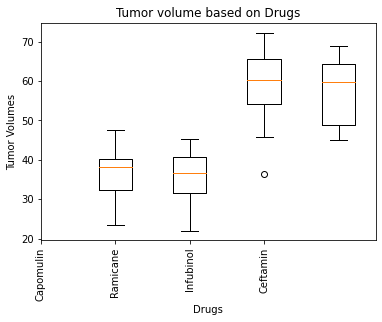

In [52]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
mouse_chart = vol_data
x_axis = np.arange(0, len(vol_data))
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor volume based on Drugs')
ax1.set_xlabel('Drugs')
ax1.set_ylabel('Tumor Volumes')
ax1.boxplot(mouse_chart)
tick_locations = [x for x in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
#plt.xlim(-0.50, len(x_axis)-0.50)
#plt.ylim(0, max(vol_data))
plt.xticks(rotation=90)
plt.show()

## Line and Scatter Plots

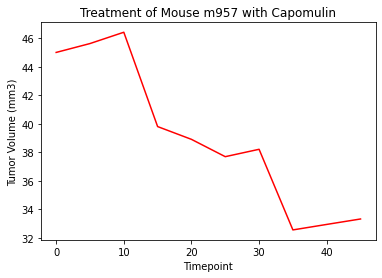

In [32]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_mouse = duplicate_mouse_drop.loc[duplicate_mouse_drop['Mouse ID']== 'm957']
plt.plot(capomulin_mouse['Timepoint'], capomulin_mouse['Tumor Volume (mm3)'], color= 'r')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Treatment of Mouse m957 with Capomulin')
plt.show()

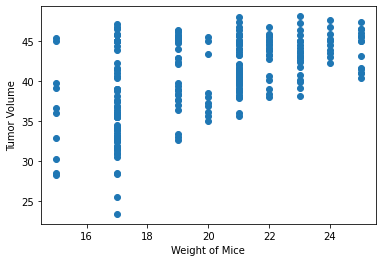

In [33]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
total_capomulin = duplicate_mouse_drop.loc[duplicate_mouse_drop['Drug Regimen']== 'Capomulin']
plt.scatter(total_capomulin['Weight (g)'],total_capomulin['Tumor Volume (mm3)'])
plt.xlabel('Weight of Mice')
plt.ylabel('Tumor Volume')
plt.show()

## Correlation and Regression

In [34]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(total_capomulin["Weight (g)"], total_capomulin["Tumor Volume (mm3)"])[0],2)
Linregress = st.linregress(total_capomulin["Weight (g)"], total_capomulin["Tumor Volume (mm3)"])
Linregress

LinregressResult(slope=0.9609669432428346, intercept=21.489827213299584, rvalue=0.5256995552077166, pvalue=9.605446629502282e-18, stderr=0.10298279892023657)

<function matplotlib.pyplot.show(*args, **kw)>

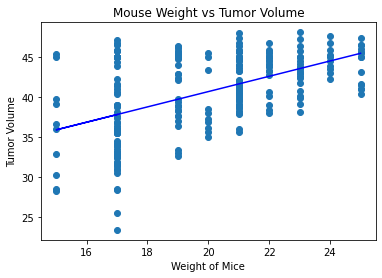

In [35]:
slope = 0.9609669432428346
intercept = 21.489827213299584
regression_line = total_capomulin["Weight (g)"]*slope+intercept
plt.plot(total_capomulin['Weight (g)'], regression_line, color="blue")
plt.scatter(total_capomulin['Weight (g)'],total_capomulin['Tumor Volume (mm3)'])
plt.xlabel('Weight of Mice')
plt.ylabel('Tumor Volume')
plt.title('Mouse Weight vs Tumor Volume')

plt.show